## Comparison of Hauptstimme annotations and video annotations for two proofs of concept:

Our proofs of concept are movement 1 of Beethoven's second symphony and movement 4 of Beach's 'Gaelic' symphony.

In [2]:
from pathlib import Path
import sys

src_path = Path().resolve().parent
sys.path.insert(0, str(src_path))

In [3]:
import pandas as pd
from datetime import datetime
from src.compare_annotations import *
from src.segmentation import get_seg_pts_vec, evaluate_seg_pts, plot_seg_pts_eval
from src.constants import DATA_PATH

In [4]:
dir = "../proofs_of_concept_files"

### Beethoven arguments:

In [ ]:
score_mscz = DATA_PATH / "Beethoven,_Ludwig_van/Symphony_No.2,_Op.36/1/Beethoven_Op.36_1.mscz"

aligned_annotations = f"{dir}/{score_mscz.stem}_annotations_aligned.csv"
score_tstamp_col = f"RNS_tstamp"
score_annotation_col = "instrument"

video_annotations = f"{dir}/RNS_{score_mscz.stem}.csv"
video_tstamp_col = "scene_start"
video_annotation_col = "focal_instrument"

start_time = datetime.strptime("00:00:07", "%H:%M:%S").time()
end_time = datetime.strptime("00:12:10", "%H:%M:%S").time()

Run the above cell then go to "The comparison".

### Beach arguments:

In [ ]:
score_mscz = DATA_PATH / "Beach,_Amy/Symphony_in_E_minor_(Gaelic),_Op.32/4/Beach_Op.32_4.mscz"

aligned_annotations = f"{dir}/{score_mscz.stem}_annotations_aligned.csv"
score_tstamp_col = f"Seattle_tstamp"
score_annotation_col = "instrument"

video_annotations = f"{dir}/Seattle_{score_mscz.stem}.csv"
video_tstamp_col = "scene_start"
video_annotation_col = "focal_instrument"

start_time = datetime.strptime("00:00:00", "%H:%M:%S").time()
end_time = datetime.strptime("00:09:37", "%H:%M:%S").time()

Run the above cell then go to "The comparison".

### The comparison:

In [11]:
# Get part relationship summary
score_summary = score_mscz.parent / f"{score_mscz.stem}_part_relations.csv"
score_summary_df = pd.read_csv(score_summary)

# Get aligned Hauptstimme annotations
aligned_annotations_df = pd.read_csv(aligned_annotations)

# Get video annotations
video_annotations_df = pd.read_csv(video_annotations)

# Declare what to round each timestamp to
round_to = 0.25
# Declare the start and end timestamps of the video
start_tstamp = (start_time.hour*60 + start_time.minute) * 60 + start_time.second
end_tstamp = (end_time.hour*60 + end_time.minute) * 60 + end_time.second
# Declare the tolerance when comparing timestamps
tau = 4     # Tolerance of 1 second

In [12]:
# Get a vector of the video annotations
video_annotations_df[video_annotation_col] = get_default_instrument_names(
	video_annotations_df[video_annotation_col]
)
video_annotations_vec = get_annotations_vec(
	video_annotations_df, video_tstamp_col, video_annotation_col, round_to, start_tstamp, end_tstamp
)

Compare the instruments:

In [10]:
haupt_video_comparison(aligned_annotations_df, score_summary_df, video_annotations_vec, score_tstamp_col, round_to, start_tstamp)

Match percentage: 20.78822000866176
Partial match percentage: 2.252057167605024
No match percentage: 28.36725855348636
Can't match percentage: 48.59246427024686


Compare the timestamps:

In [11]:
# Get vectors for the annotation segmentation points
haupt_seg_pts = aligned_annotations_df[score_tstamp_col].to_list()
haupt_seg_pts_vec = get_seg_pts_vec(haupt_seg_pts, round_to, end_tstamp)

video_seg_pts = video_annotations_df[video_tstamp_col].to_list()
video_seg_pts_vec = get_seg_pts_vec(
    video_seg_pts, round_to, end_tstamp
)

Hauptstimme points compared to video points:
P = 0.814;  R = 0.250;  F = 0.383


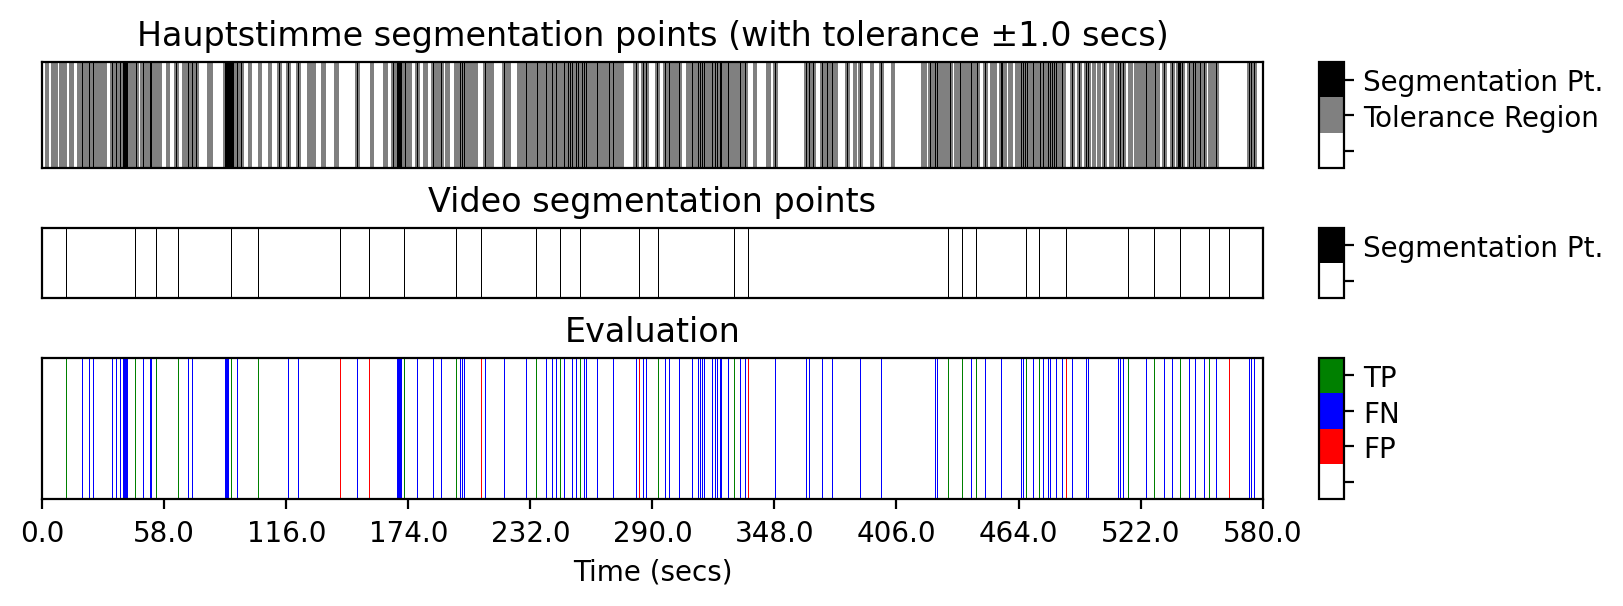

In [12]:
P, R, F, _, _, _, _, _ = evaluate_seg_pts(
    haupt_seg_pts_vec, video_seg_pts_vec, tau
)
print("Hauptstimme points compared to video points:")
print("P = %0.3f;  R = %0.3f;  F = %0.3f" % (P, R, F))
fig, ax = plot_seg_pts_eval(
    haupt_seg_pts_vec, video_seg_pts_vec, tau, round_to, other_seg_pts="Video"
)